# Clustering Github users

### Import

In [49]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

# ML import
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA

### Open data

In [50]:
# Read the JSON file
with open('../../download/data.json', 'r') as f:
    data = json.load(f)

# Extract the desired item from the JSON data
item = data['stargazers']

# Flatten the JSON data into a Pandas DataFrame
df = json_normalize(item)
df = df.loc[:, ['name', 'starred', 'followers', 'following']]

/tmp/ipykernel_10586/1324671369.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(item)


### Clean data

In [51]:
import re

df['following'] = df['following'].apply(lambda x: " ".join(x).lower())
df['following'] = df['following'].apply(lambda x: re.sub(r'[^a-z0-9 ]', '', x))
df['followers'] = df['followers'].apply(lambda x: " ".join(x).lower())
df['followers'] = df['followers'].apply(lambda x: re.sub(r'[^a-z0-9 ]', '', x))
df['starred'] = df['starred'].apply(lambda x: " ".join(x).lower())
df['starred'] = df['starred'].apply(lambda x: re.sub(r'[^a-z0-9 ]', '', x))

### Encoding

In [52]:
# TF-IDF implementation
tfidf = TfidfVectorizer()

# Following
tfidf_matrix_following =  tfidf.fit_transform(df['following'])
following_df = pd.DataFrame(tfidf_matrix_following.toarray(), columns=tfidf.get_feature_names_out())

# Followers
tfidf_matrix_followers =  tfidf.fit_transform(df['followers'])
followers_df = pd.DataFrame(tfidf_matrix_followers.toarray(), columns=tfidf.get_feature_names_out())

# Starred
tfidf_matrix_starred =  tfidf.fit_transform(df['starred'])
followers_df = pd.DataFrame(tfidf_matrix_starred.toarray(), columns=tfidf.get_feature_names_out())

#### Following

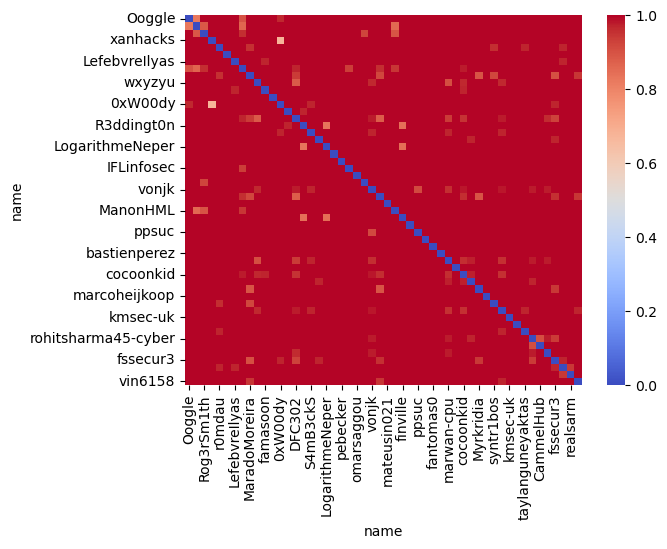

In [53]:
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns


distance_matrix_fing = cosine_distances(tfidf_matrix_following)
distance_df_following = pd.DataFrame(distance_matrix_fing, index=df['name'], columns=df['name'])
sns.heatmap(distance_df_following, cmap='coolwarm')
plt.show()

#### Followers

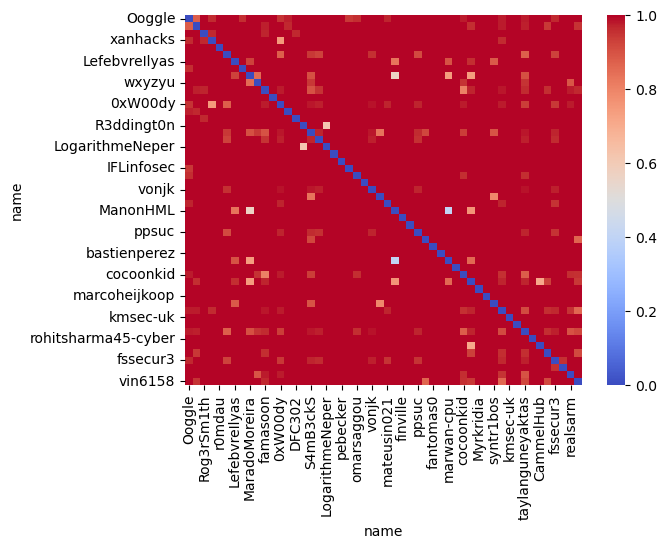

In [54]:
distance_matrix_fer = cosine_distances(tfidf_matrix_followers)
distance_df_followers = pd.DataFrame(distance_matrix_fer, index=df['name'], columns=df['name'])
sns.heatmap(distance_df_followers, cmap='coolwarm')
plt.show()

### Starred

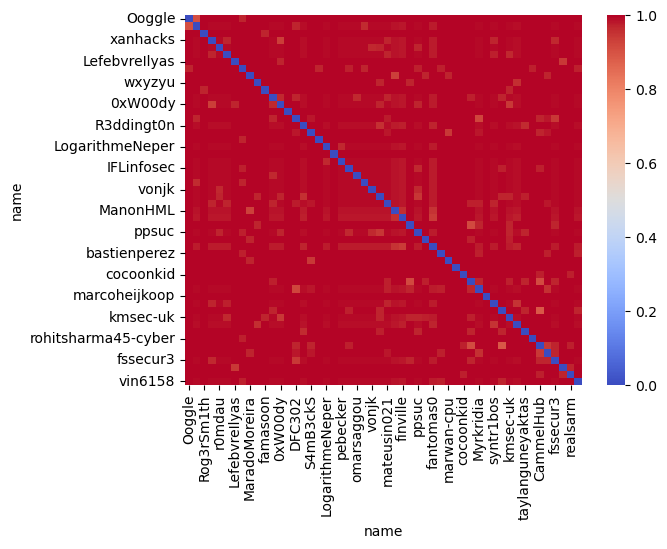

In [55]:
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns


distance_matrix_starred = cosine_distances(tfidf_matrix_starred)
distance_df_starred = pd.DataFrame(distance_matrix_starred, index=df['name'], columns=df['name'])
sns.heatmap(distance_df_starred, cmap='coolwarm')
plt.show()

### Merge 3 matrix

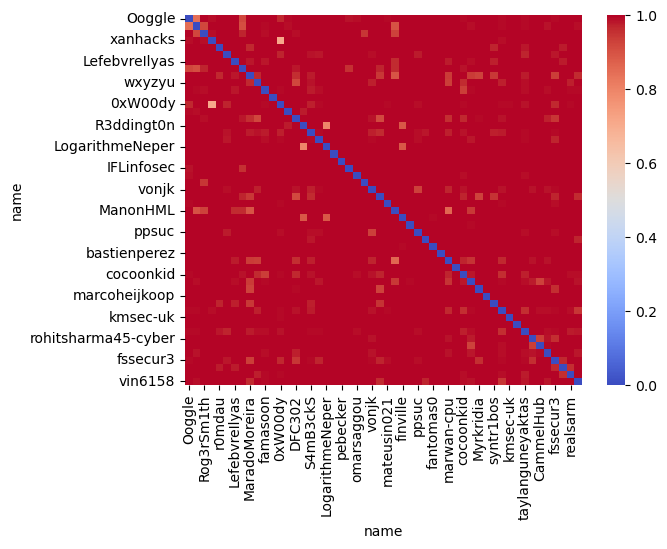

In [56]:
global_distance = (70*distance_matrix_fing + 23*distance_matrix_fer + 7*distance_matrix_starred)/100
distance_df = pd.DataFrame(global_distance, index=df['name'], columns=df['name'])
sns.heatmap(distance_df, cmap='coolwarm')
plt.show()

/tmp/ipykernel_10586/1779957322.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix = shc.linkage(global_distance, method='ward')


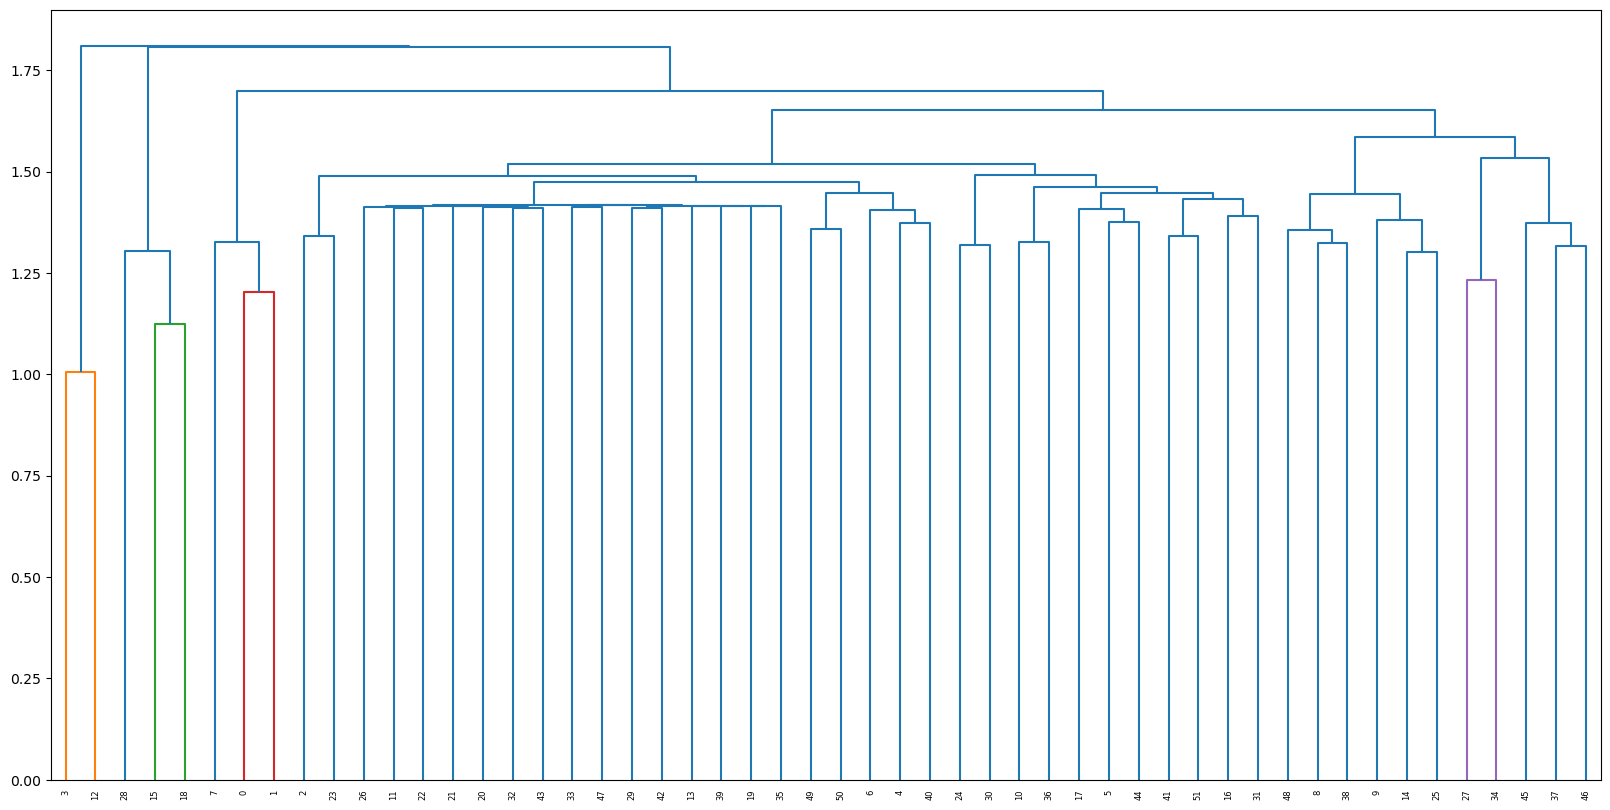

In [57]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, leaves_list



# Linkage matrix
link_matrix = shc.linkage(global_distance, method='ward')
indices = leaves_list(link_matrix)
labels = df.iloc[indices]['name']

plt.figure(figsize=(20,10))
dendrogram(link_matrix)
plt.show()

### Cut cluster

In [58]:
pd.set_option('display.max_rows', labels.shape[0]+1)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

# clusters = fcluster(link_matrix,t=2.5, criterion='distance')
clusters = fcluster(link_matrix,t=1.3, criterion='distance')
df_clust = pd.DataFrame({'Cluster':clusters, 'Features':df['name']})
df_clust = df_clust.sort_values(by=['Cluster'])
df_clust

,Cluster,Features
3,1,xanhacks
12,1,0xW00dy
18,2,LogarithmeNeper
15,2,R3ddingt0n
28,3,finville
0,4,Ooggle
1,4,kevin-mizu
7,5,Guigui1901
2,6,Rog3rSm1th
23,7,arthur-pte


In [59]:
print(df_clust[df_clust['Cluster'] == 4])

   Cluster    Features
0        4      Ooggle
1        4  kevin-mizu


In [60]:
print(df_clust[df_clust['Cluster'] == 1])

    Cluster  Features
3         1  xanhacks
12        1   0xW00dy
